# Census Income-ML-Project

## Understanding the problem statement

Census Income Data Set
Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

 ## Dataset Link: http://archive.ics.uci.edu/ml/datasets/Census+Income

In [1]:
## importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Uploading the dataset:

In [2]:
## loading the dataset :
data=pd.read_csv('adult.csv')

In [3]:
## lets check the first five records :
data.head()

,age,workclass,fnlwgt,education,education-num,material status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
## lets check the last five records :
data.tail()

,age,workclass,fnlwgt,education,education-num,material status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## EDA Process:

In [5]:
## hape of the data (Rows, Columns) :
data.shape

(32561, 15)

In [6]:
## total information about dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   material status  32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hrs-per-week     32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
## lets check the column names :
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'material status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hrs-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
## lets check the datatypes :
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
material status    object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hrs-per-week        int64
native-country     object
income             object
dtype: object

**********Now we will check all object type data from below cell :*************

 ## checking the null values:

In [9]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
material status    0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hrs-per-week       0
native-country     0
income             0
dtype: int64

In [10]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
data['workclass']=data.replace('?',np.nan)

## Univariate/Bivariate Analysis

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
AxesSubplot(0.125,0.125;0.775x0.755)


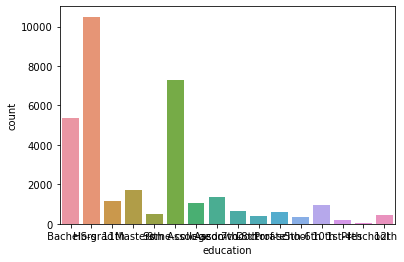

In [12]:
print(data['education'].unique())
print(sns.countplot(data['education']))

In [13]:
data['material status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [14]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [15]:
data['occupation']=data.replace('?',np.nan)

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
AxesSubplot(0.125,0.125;0.775x0.755)


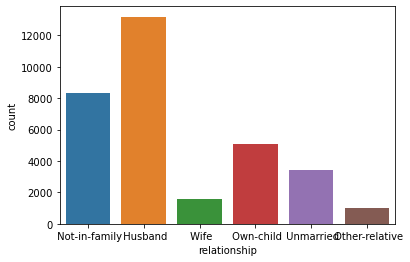

In [16]:
print(data['relationship'].unique())
print(sns.countplot(data['relationship']))

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
AxesSubplot(0.125,0.125;0.775x0.755)


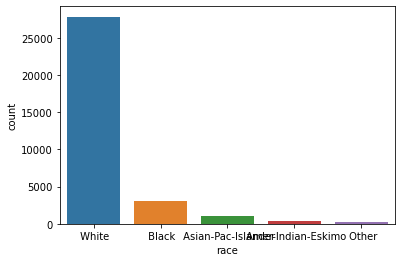

In [17]:
print(data['race'].unique())
print(sns.countplot(data['race']))

[' Male' ' Female']
AxesSubplot(0.125,0.125;0.775x0.755)


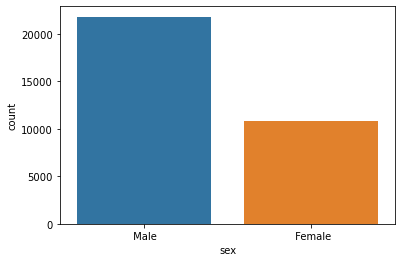

In [18]:
print(data['sex'].unique())
print(sns.countplot(data['sex']))

In [19]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [20]:
data['native-country']=data.replace('?',np.nan)

In [21]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Stastastical Analysis

In [22]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hrs-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Correlation Matrix

In [23]:
## corelation between the features :
dfr=data.corr()
dfr

,age,fnlwgt,education-num,capital-gain,capital-loss,hrs-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hrs-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


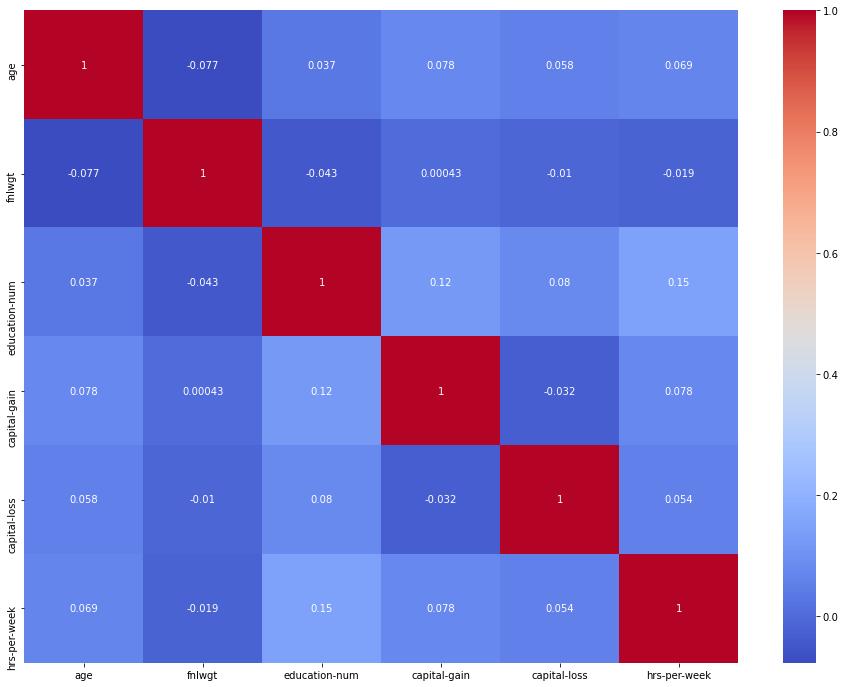

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(dfr,annot=True,cmap='coolwarm')
plt.show()

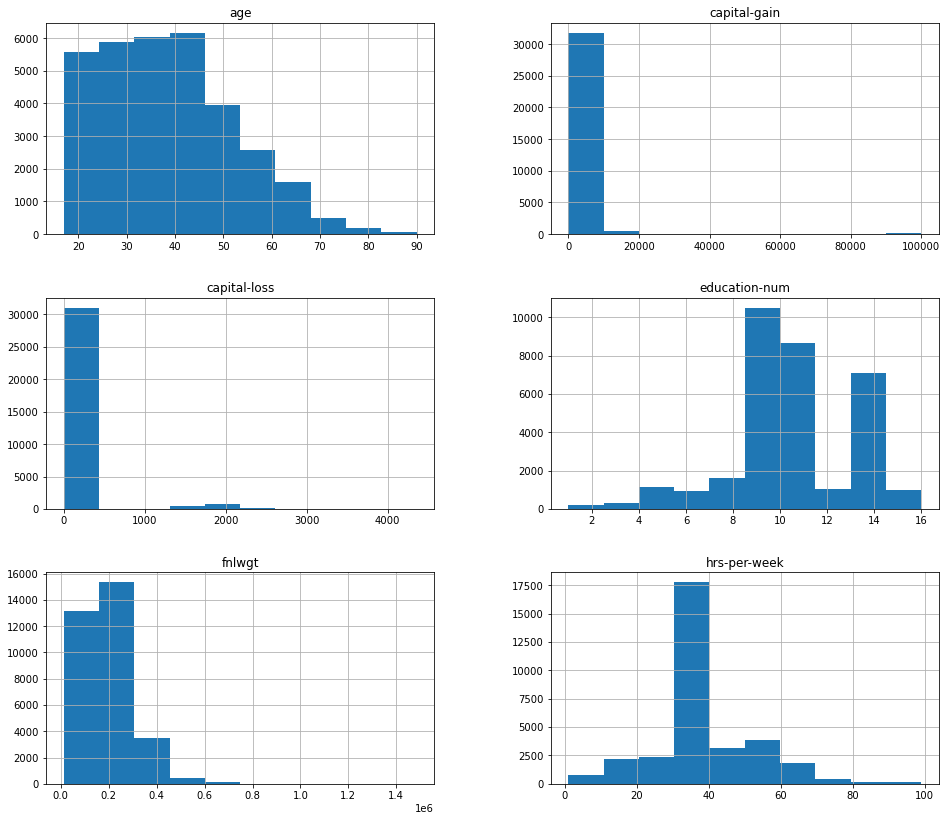

In [25]:
data.hist(figsize=(16,14))
plt.show()

## Checking the outliers

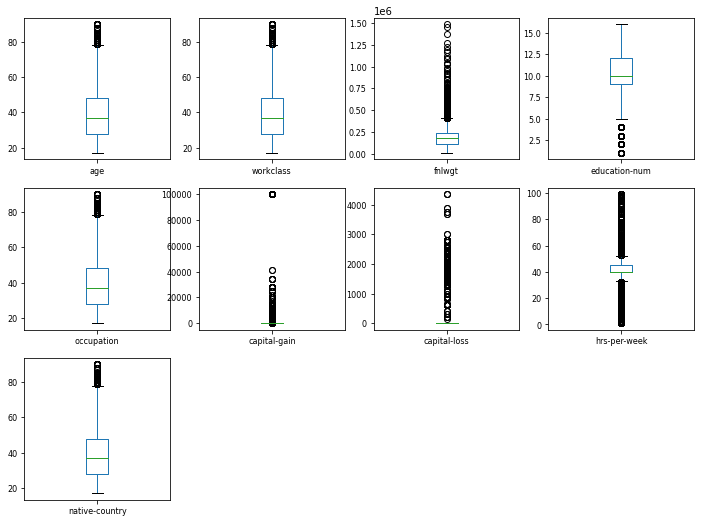

In [26]:
## checking outliers :
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [27]:
## lets check the skewness in the data :
data.skew()

age                0.558743
workclass          0.558743
fnlwgt             1.446980
education-num     -0.311676
occupation         0.558743
capital-gain      11.953848
capital-loss       4.594629
hrs-per-week       0.227643
native-country     0.558743
dtype: float64

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i]=le.fit_transform(data[i])

In [30]:
## Again check the dataset :
data.head()

,age,workclass,fnlwgt,education,education-num,material status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,income
0,39,22,77516,9,13,4,22,1,4,1,2174,0,40,22,0
1,50,33,83311,9,13,2,33,0,4,1,0,0,13,33,0
2,38,21,215646,11,9,0,21,1,4,1,0,0,40,21,0
3,53,36,234721,1,7,2,36,0,2,1,0,0,40,36,0
4,28,11,338409,9,13,2,11,5,2,0,0,0,40,11,0


In [31]:
## lets check the skewness :
data.skew()

age                 0.558743
workclass           0.555588
fnlwgt              1.446980
education          -0.934042
education-num      -0.311676
material status    -0.013508
occupation          0.555588
relationship        0.786818
race               -2.435386
sex                -0.719293
capital-gain       11.953848
capital-loss        4.594629
hrs-per-week        0.227643
native-country      0.555588
income              1.212430
dtype: float64

## Splitting the dataset

In [32]:
## splitting the data into input and output :
X=data.drop('income',axis=1)
y=data['income']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Scaling the dataset

In [34]:
## importing the standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Loading the scikit-learn libraries

In [35]:
## importing the essential libraries :
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


## Using for loop to check with multiple libraries

In [36]:
##importing the esential libraries :
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('***********Accuracy score of*************',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


***********Accuracy score of************* LogisticRegression() is:
0.8012529173320231
[[5988  226]
 [1392  535]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      6214
           1       0.70      0.28      0.40      1927

    accuracy                           0.80      8141
   macro avg       0.76      0.62      0.64      8141
weighted avg       0.79      0.80      0.77      8141



***********Accuracy score of************* DecisionTreeClassifier() is:
0.8048151332760103
[[5380  834]
 [ 755 1172]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6214
           1       0.58      0.61      0.60      1927

    accuracy                           0.80      8141
   macro avg       0.73      0.74      0.73      8141
weighted avg       0.81      0.80      0.81      8141



***********Accuracy score of************* SVC() is:
0.7994103918437538
[[6209    5]
 [1628  299]]
              

## Cross-Validation

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [38]:
rfc.fit(X_train,y_train)
y_predict=rfc.predict(X_test)
accuracy_score(y_test,y_predict)

0.837612086967203

In [39]:
cross_val_score(rfc,X,y).mean()

0.8382727740512171

In [40]:
rfc.fit(X_train,y_train)
y_predict=rfc.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 1, 0])

## roc_auc_score

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_predict=rfc.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 1, 0])

In [42]:
fpr,tpr,thresholds=roc_curve(y_test,y_predict)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.08368201 1.        ]
[0.         0.58899844 1.        ]
[2 1 0]


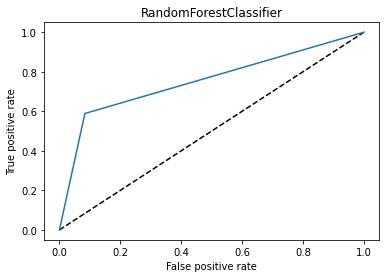

In [43]:
plt.plot([0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

In [44]:
auc_score=roc_auc_score(y_test,rfc.predict(X_test))
print(auc_score)

0.7526582174038601


In [45]:
rfc.fit(X_train,y_train)
y_predict=rfc.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 1, 0])

## Conclusion-We will go with RandomForestClassifier.

In [46]:
## saving the model :
import joblib
joblib.dump(rfc,'CensusIncome.pkl')

['CensusIncome.pkl']